In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential, datasets, regularizers
from keras.layers import Dense, Flatten, Dropout

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [31]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

((60000, 28, 28), (60000,))

In [5]:
X_train, X_valid = X_train_full[:50000], X_train_full[50000:]
y_train, y_valid = y_train_full[:50000], y_train_full[50000:]

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
X_train = X_train/255
X_valid = X_valid/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.7116 - loss: 0.8419 - val_accuracy: 0.8470 - val_loss: 0.4293
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.8538 - loss: 0.4082 - val_accuracy: 0.8626 - val_loss: 0.4036
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8706 - loss: 0.3622 - val_accuracy: 0.8664 - val_loss: 0.3747
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8787 - loss: 0.3273 - val_accuracy: 0.8762 - val_loss: 0.3455
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.8860 - loss: 0.3111 - val_accuracy: 0.8776 - val_loss: 0.3491
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8931 - loss: 0.2866 - val_accuracy: 0.8805 - val_loss: 0.3311
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8973 - loss: 0.2755 - val_accuracy: 0.8743 - val_loss: 0.3362
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.9001 - loss: 0.2682 - va

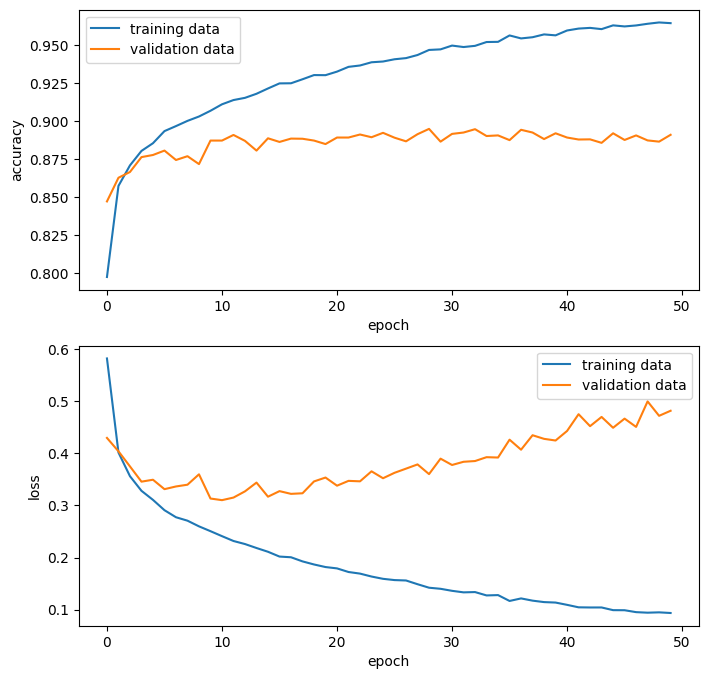

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

## the above is a clear case of overfitting. We will try to reduce the overfitting using the below regularization methods

#### l2 regularization

In [14]:
model4 = Sequential()
model4.add(Flatten(input_shape=(28,28)))
model4.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l2(0.005)))
model4.add(Dense(10, activation='softmax'))

In [15]:
model4.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history4 = model4.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.6862 - loss: 1.9448 - val_accuracy: 0.8250 - val_loss: 0.8961
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8284 - loss: 0.8498 - val_accuracy: 0.8317 - val_loss: 0.7634
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8324 - loss: 0.7476 - val_accuracy: 0.8316 - val_loss: 0.7015
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.8412 - loss: 0.6866 - val_accuracy: 0.8338 - val_loss: 0.6866
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8402 - loss: 0.6621 - val_accuracy: 0.8303 - val_loss: 0.6717
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8485 - loss: 0.6253 - val_accuracy: 0.8466 - val_loss: 0.6129
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.8466 - loss: 0.6150 - val_accuracy: 0.8493 - val_loss: 0.6033
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.8525 - loss: 0.5936 - 

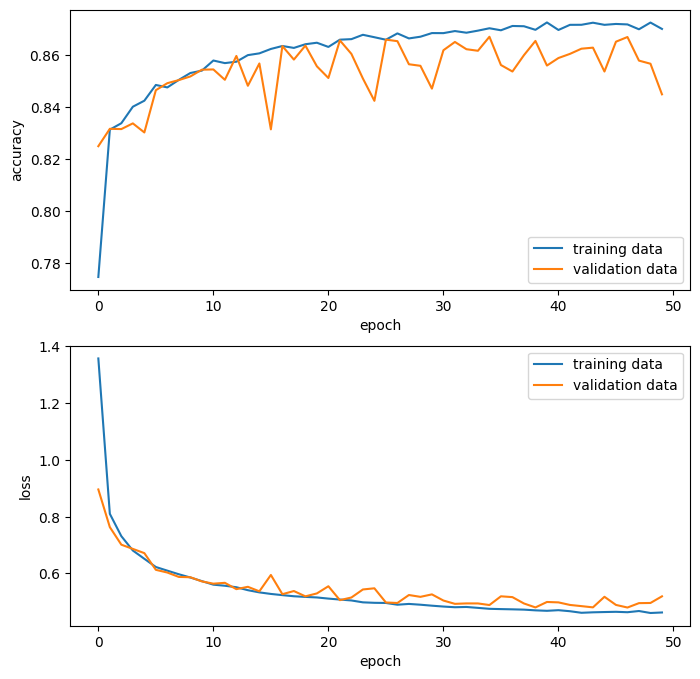

In [17]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### l1 regularizer

In [18]:
model6 = Sequential()
model6.add(Flatten(input_shape=(28,28)))
model6.add(Dense(128, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(64, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(32, activation='relu', kernel_regularizer= regularizers.l1(0.005)))
model6.add(Dense(10, activation='softmax'))

In [19]:
model6.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history6 = model6.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.6020 - loss: 9.5830 - val_accuracy: 0.7291 - val_loss: 1.6579
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.7377 - loss: 1.5755 - val_accuracy: 0.7445 - val_loss: 1.3924
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7611 - loss: 1.3461 - val_accuracy: 0.7580 - val_loss: 1.2817
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.7735 - loss: 1.2258 - val_accuracy: 0.7627 - val_loss: 1.2106
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7792 - loss: 1.1577 - val_accuracy: 0.7783 - val_loss: 1.1264
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7857 - loss: 1.0977 - val_accuracy: 0.7779 - val_loss: 1.1151
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7894 - loss: 1.0702 - val_accuracy: 0.7954 - val_loss: 1.0392
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.7925 - loss: 1.0382 - 

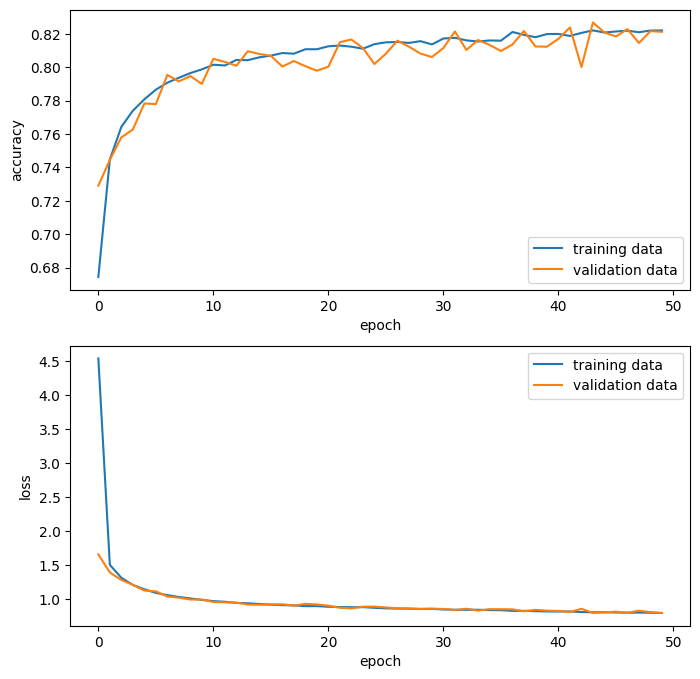

In [21]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

### drop out regularization

In [22]:
model10 = Sequential()
model10.add(Flatten(input_shape=(28,28)))
model10.add(Dense(128, activation='relu'))
model10.add(Dropout(rate=0.4))
model10.add(Dense(64, activation='relu'))
model10.add(Dropout(rate=0.3))
model10.add(Dense(32, activation='relu'))
model10.add(Dense(10, activation='softmax'))

In [23]:
model10.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
history10 = model10.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5676 - loss: 1.1866 - val_accuracy: 0.8246 - val_loss: 0.4827
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8052 - loss: 0.5514 - val_accuracy: 0.8454 - val_loss: 0.4270
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8281 - loss: 0.4828 - val_accuracy: 0.8527 - val_loss: 0.4061
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8394 - loss: 0.4469 - val_accuracy: 0.8601 - val_loss: 0.3858
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8463 - loss: 0.4274 - val_accuracy: 0.8611 - val_loss: 0.3725
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.8498 - loss: 0.4171 - val_accuracy: 0.8667 - val_loss: 0.3657
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.8553 - loss: 0.4005 - val_accuracy: 0.8702 - val_loss: 0.3593
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8614 - loss: 0.3865 - val_

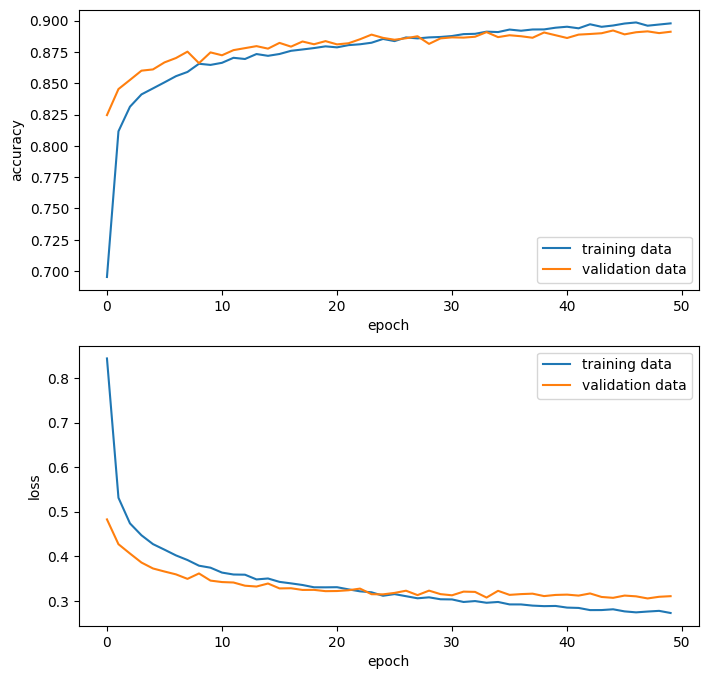

In [25]:
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [26]:
### Here we changing the number of neurons in the layers

In [27]:
model11 = Sequential()
model11.add(Flatten(input_shape=(28,28)))
model11.add(Dense(128, activation='relu'))
model11.add(Dense(10, activation='softmax'))

model11.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history11 = model11.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7376 - loss: 0.7776 - val_accuracy: 0.8428 - val_loss: 0.4489
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.8487 - loss: 0.4279 - val_accuracy: 0.8597 - val_loss: 0.4048
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8677 - loss: 0.3805 - val_accuracy: 0.8629 - val_loss: 0.3963
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - accuracy: 0.8755 - loss: 0.3537 - val_accuracy: 0.8705 - val_loss: 0.3719
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.8806 - loss: 0.3340 - val_accuracy: 0.8726 - val_loss: 0.3569
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.8875 - loss: 0.3137 - val_accuracy: 0.8803 - val_loss: 0.3409
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - accuracy: 0.8911 - loss: 0.2999 - val_accuracy: 0.8812 - val_loss: 0.3359
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8956 - loss: 0.2887 - va

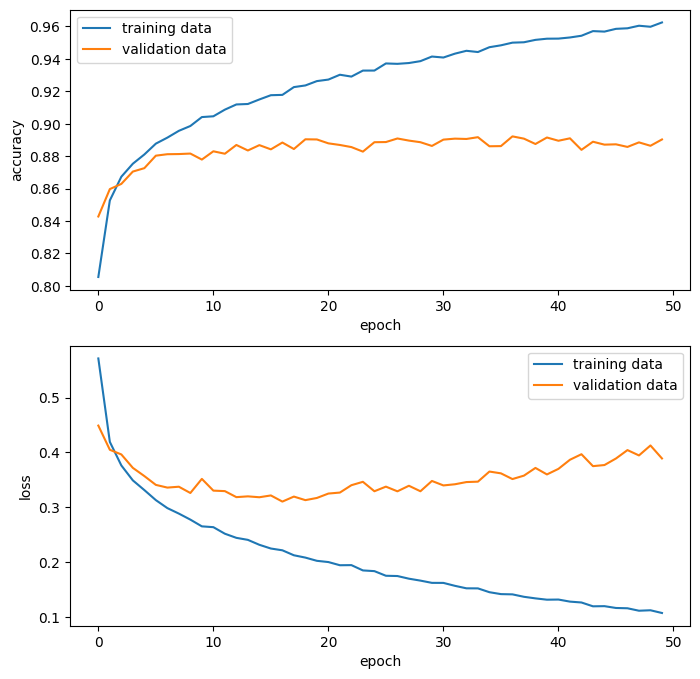

In [28]:
acc = history11.history['accuracy']
val_acc = history11.history['val_accuracy']

loss = history11.history['loss']
val_loss = history11.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();

In [29]:
model12 = Sequential()
model12.add(Flatten(input_shape=(28,28)))
model12.add(Dense(64, activation='relu'))
model12.add(Dense(10, activation='softmax'))

model12.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

history12 = model12.fit(x=X_train, y=y_train, batch_size=128, epochs=50, validation_data=(X_valid, y_valid))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7166 - loss: 0.8496 - val_accuracy: 0.8432 - val_loss: 0.4598
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8477 - loss: 0.4421 - val_accuracy: 0.8460 - val_loss: 0.4347
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8592 - loss: 0.3959 - val_accuracy: 0.8546 - val_loss: 0.4065
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8702 - loss: 0.3656 - val_accuracy: 0.8526 - val_loss: 0.4099
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - accuracy: 0.8742 - loss: 0.3548 - val_accuracy: 0.8736 - val_loss: 0.3634
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.8824 - loss: 0.3301 - val_accuracy: 0.8692 - val_loss: 0.3729
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8882 - loss: 0.3168 - val_accuracy: 0.8708 - val_loss: 0.3722
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8900 - loss: 0.3099 - 

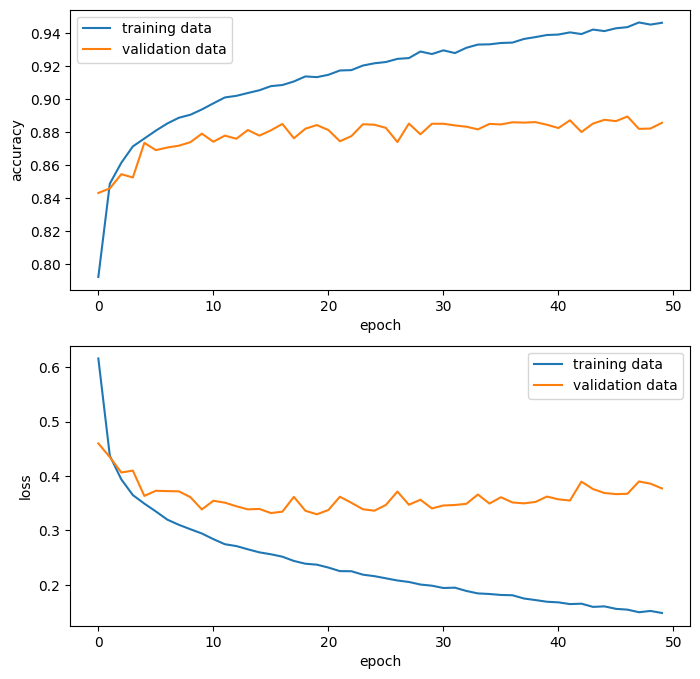

In [30]:
acc = history12.history['accuracy']
val_acc = history12.history['val_accuracy']

loss = history12.history['loss']
val_loss = history12.history['val_loss']

plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(acc, label='training data')
plt.plot(val_acc, label='validation data')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(loss, label='training data')
plt.plot(val_loss, label='validation data')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend();